# Analyzing Portfolio Risk and Return

In this Challenge, you'll assume the role of a quantitative analyst for a FinTech investing platform. This platform aims to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality. (Think about [Wealthfront](https://www.wealthfront.com/) or [Betterment](https://www.betterment.com/)). To keep the costs low, the firm uses algorithms to build each client's portfolio. The algorithms choose from various investment styles and options.

You've been tasked with evaluating four new investment options for inclusion in the client portfolios. Legendary fund and hedge-fund managers run all four selections. (People sometimes refer to these managers as **whales**, because of the large amount of money that they manage). You’ll need to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.

## Instructions

### Import the Data

Use the ``risk_return_analysis.ipynb`` file to complete the following steps:

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

3. Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

### Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents. To do so, complete the following steps:

1. Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

3. Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, complete the following steps:

1. Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

    > **Hint** Save this new DataFrame&mdash;the one that contains the data for just the four fund portfolios. You’ll use it throughout the analysis.

3. Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta. To do so, complete the following steps:

1. Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

2. Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

3. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

5. Answer the following three questions:

* Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

* Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

* Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio. To do so, complete the following steps:

1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

#### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options. To start your analysis, complete the following step:

* Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

Next, for each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Finally, answer the following two questions:

* Which of the two portfolios seem more sensitive to movements in the S&P 500?

* Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?


### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [50]:
# Import the Pandas library
import pandas as pd

# Import the Path module from the Pathlib library
from pathlib import Path

# Import the Numpy Library
import numpy as np

# Import the %matplotlib inline dependency
%matplotlib inline

#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [3]:
# Using the read_csv function and the Path module, read in the "whale_navs.csv" file from the Resources folder
# Set the "date" as the index column
# Be sure to set the DatetimeIndex using the parse_dates and infer_datetime_format parameters

whale_navs_df = pd.read_csv(
    Path("./Resources/whale_navs.csv"),
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True
)

# Review the 'tech_df' DataFrame with both the 'head' & 'tail' functions
display(whale_navs_df.head())
display(whale_navs_df.tail())  

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,31.546221,14.364969,63.319419,64.668648,342.57
2020-09-08,31.491425,14.337851,63.238988,64.344083,333.21
2020-09-09,31.526541,14.368297,63.409792,64.460992,339.79
2020-09-10,31.486896,14.388256,63.308920,64.306412,333.89
2020-09-11,31.473747,14.360482,63.281442,64.241088,334.06


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [12]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
daily_returns = whale_navs_df.pct_change().dropna()

# Review the first five rows of the daily returns DataFrame.
display(daily_returns.head())

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Returns SFM, PCI, TIGER, BRK and SP500'}, xlabel='date'>

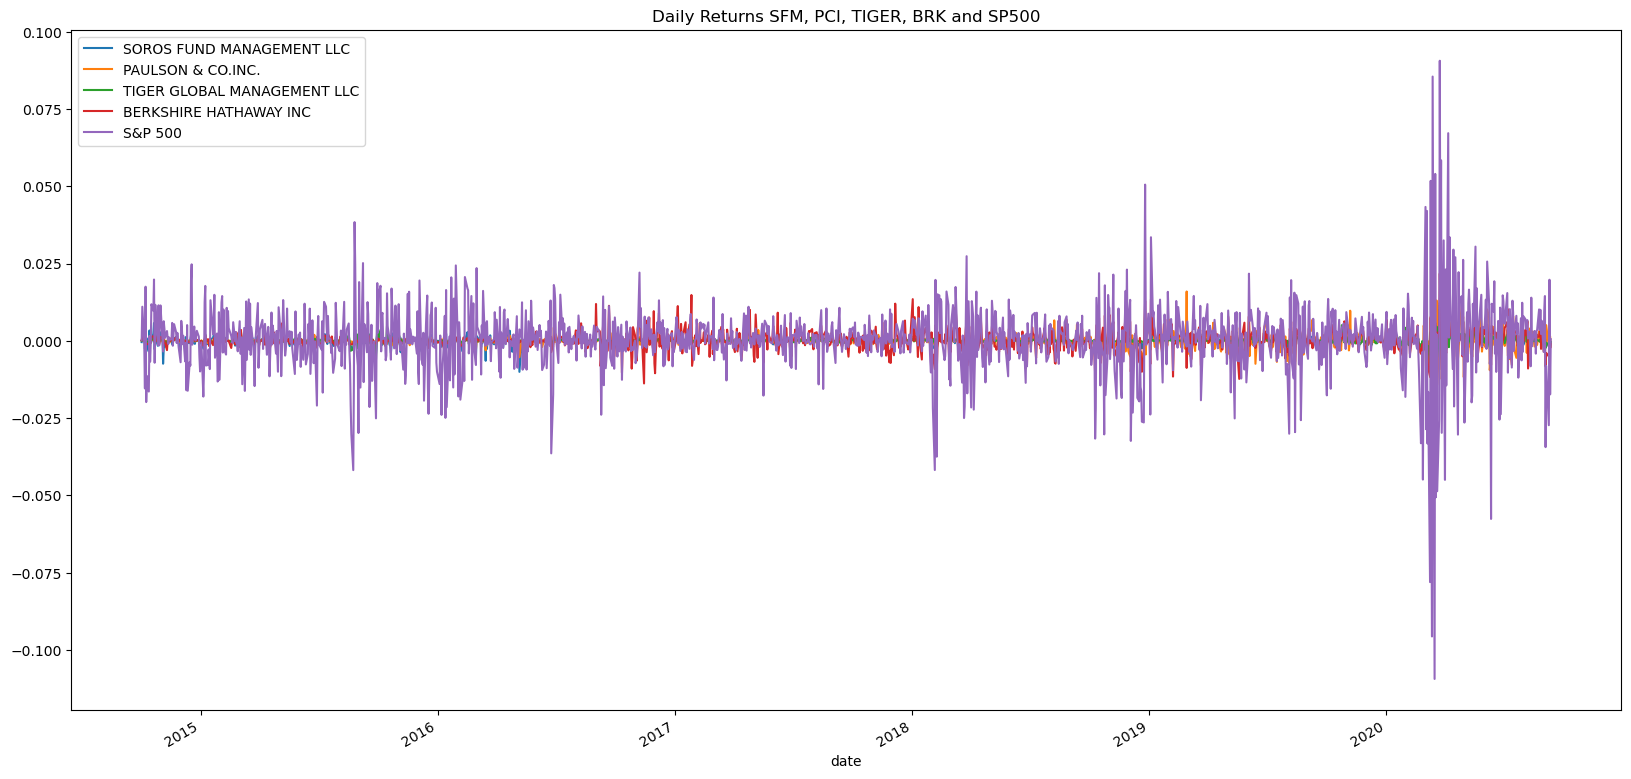

In [15]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
daily_returns.plot(figsize=(20,10),title='Daily Returns SFM, PCI, TIGER, BRK and SP500')


#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [16]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
cumulative_returns = (1 + daily_returns).cumprod()

# Review the last 5 rows of the cumulative returns DataFrame
cumulative_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'cumulative returns SFM, PCI, TIGER, BRK and SP500'}, xlabel='date'>

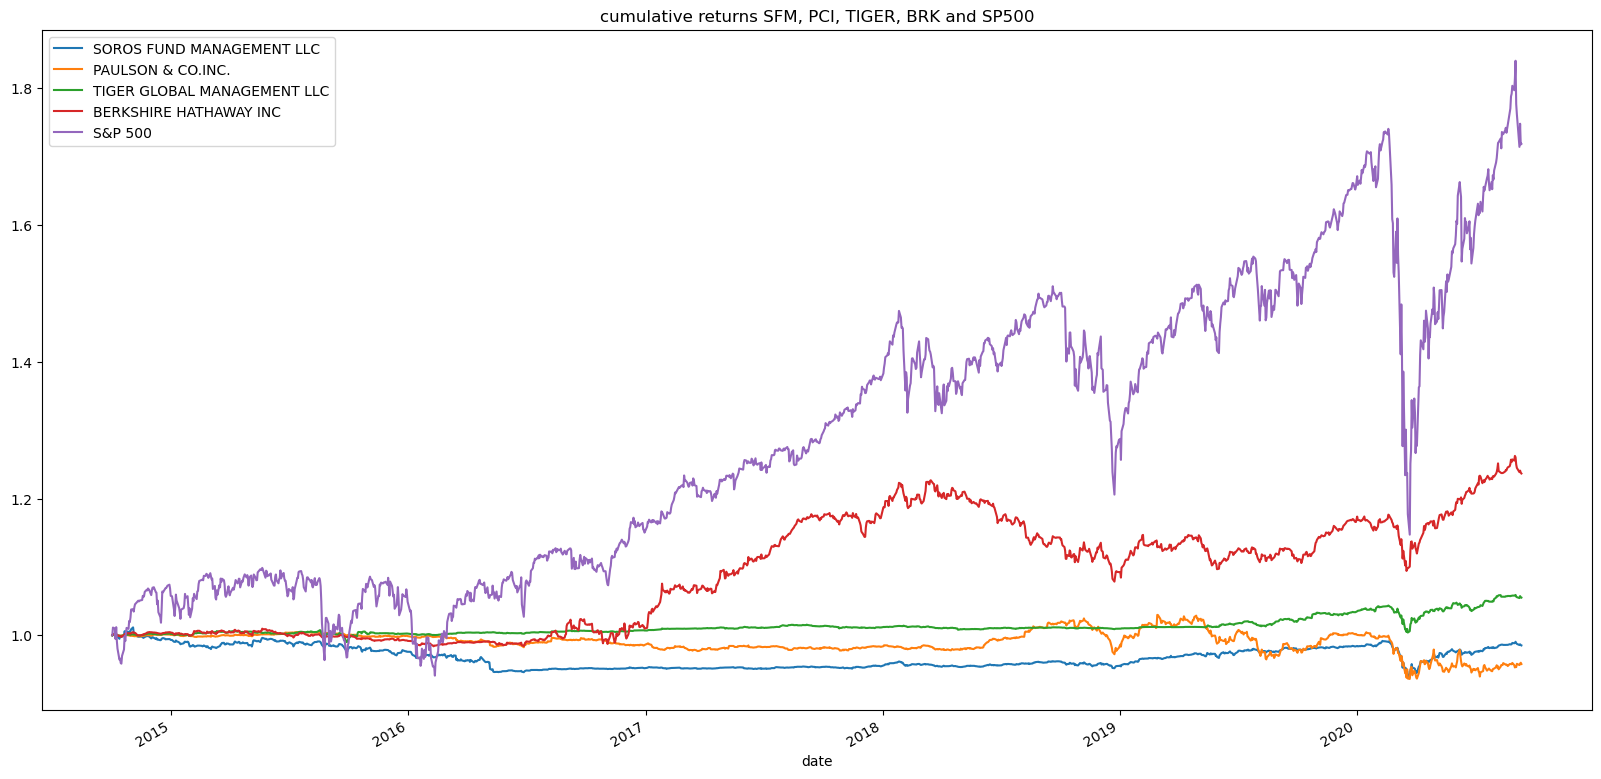

In [18]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
cumulative_returns.plot(figsize=(20,10), title='cumulative returns SFM, PCI, TIGER, BRK and SP500')

#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** Based on cumulative return data none of the funds outperform the SP500 over the full time period. In 2015 and 2016 there are short periods where all the funds outperform the SP500 but after Q1 2016 the SP500 outperforms all 4 funds significantly. Around March 2020, SP500 sees a large decrease in return due to COVID19 impact, after which quantitative easing pushes up SP500 returns even higher than before COVID.  

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Box Plots daily returns SFM, PCI, TIGER, BRK and SP500'}>

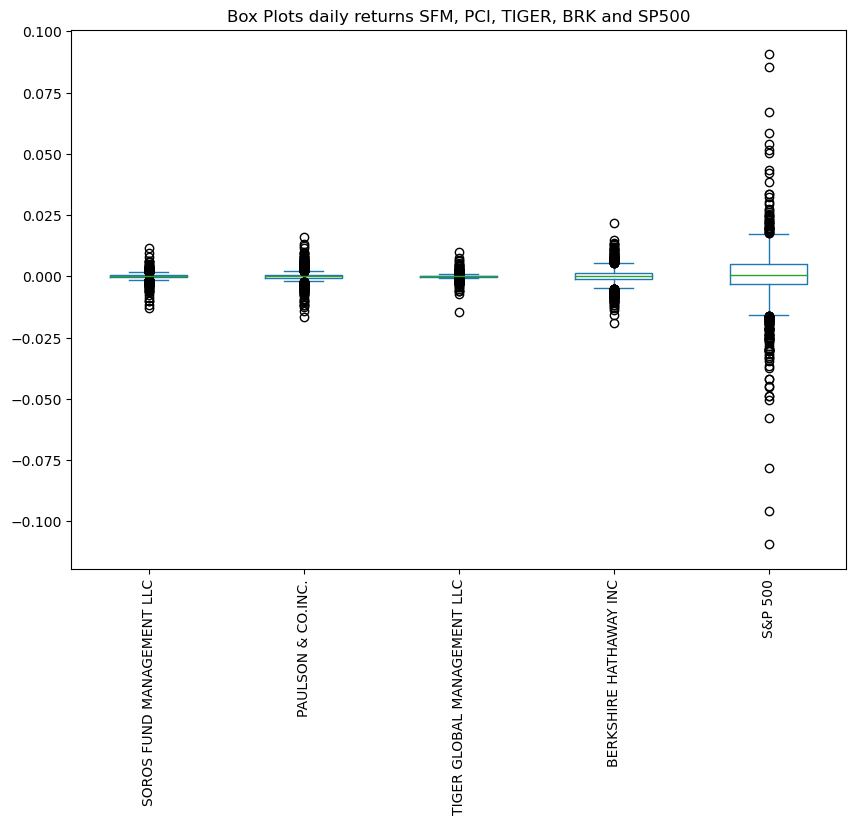

In [44]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
daily_returns.plot(figsize=(10,7),kind='box',title='Box Plots daily returns SFM, PCI, TIGER, BRK and SP500',rot=90)

#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Box Plots daily returns SFM, PCI, TIGER, and BRK'}>

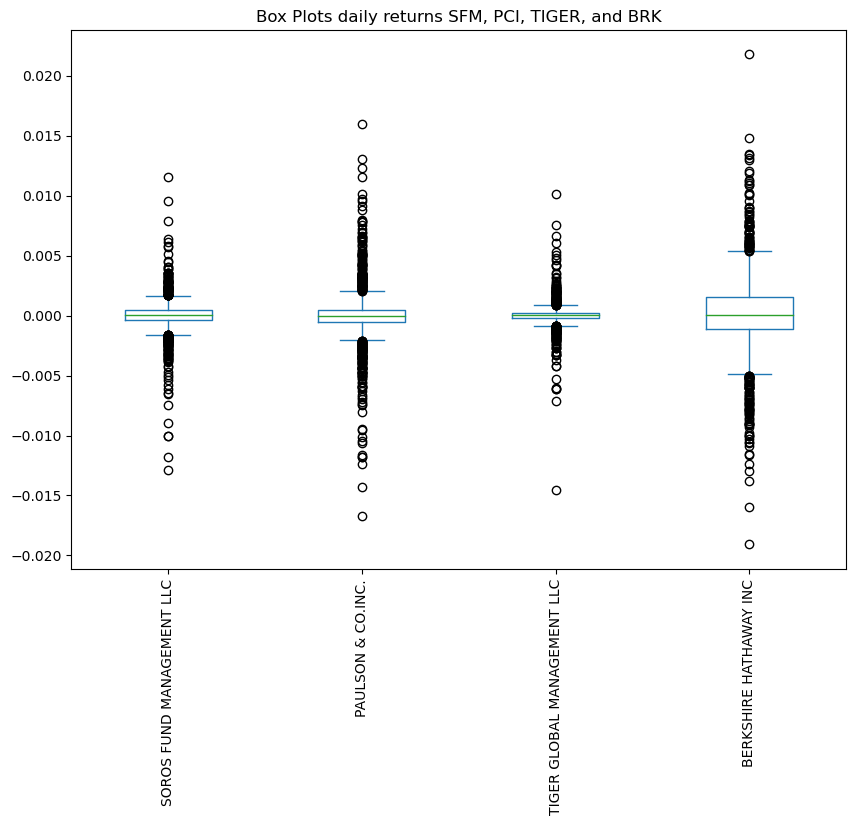

In [45]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
daily_returns_funds = daily_returns.drop('S&P 500', axis=1)

# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
daily_returns_funds.plot(figsize=(10,7),kind='box',title='Box Plots daily returns SFM, PCI, TIGER, and BRK',rot=90)


#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** Based upon above box plot of daily returns we can conclude that Berkshire Hathaway Inc was the most volatile in the measuring period as it displays the largest spread of the 4 funds and has the biggest outliers. Tiger Global Management LLC displays the smallest spread and therefor we can conclude that it had the lowest volatility during the measurement period, it also has the has the smallest outliers. 

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [48]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
standard_deviation = daily_returns.std()
# Review the standard deviations sorted smallest to largest
display(standard_deviation.sort_values())

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [52]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
trading_days = 252
annualized_standard_deviation = standard_deviation * np.sqrt(trading_days)

# Review the annual standard deviations smallest to largest
display(annualized_standard_deviation.sort_values())

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'SFM, PCI, TIGER, and BRK & SP500 - 21 Day Standard Deviation'}, xlabel='date'>

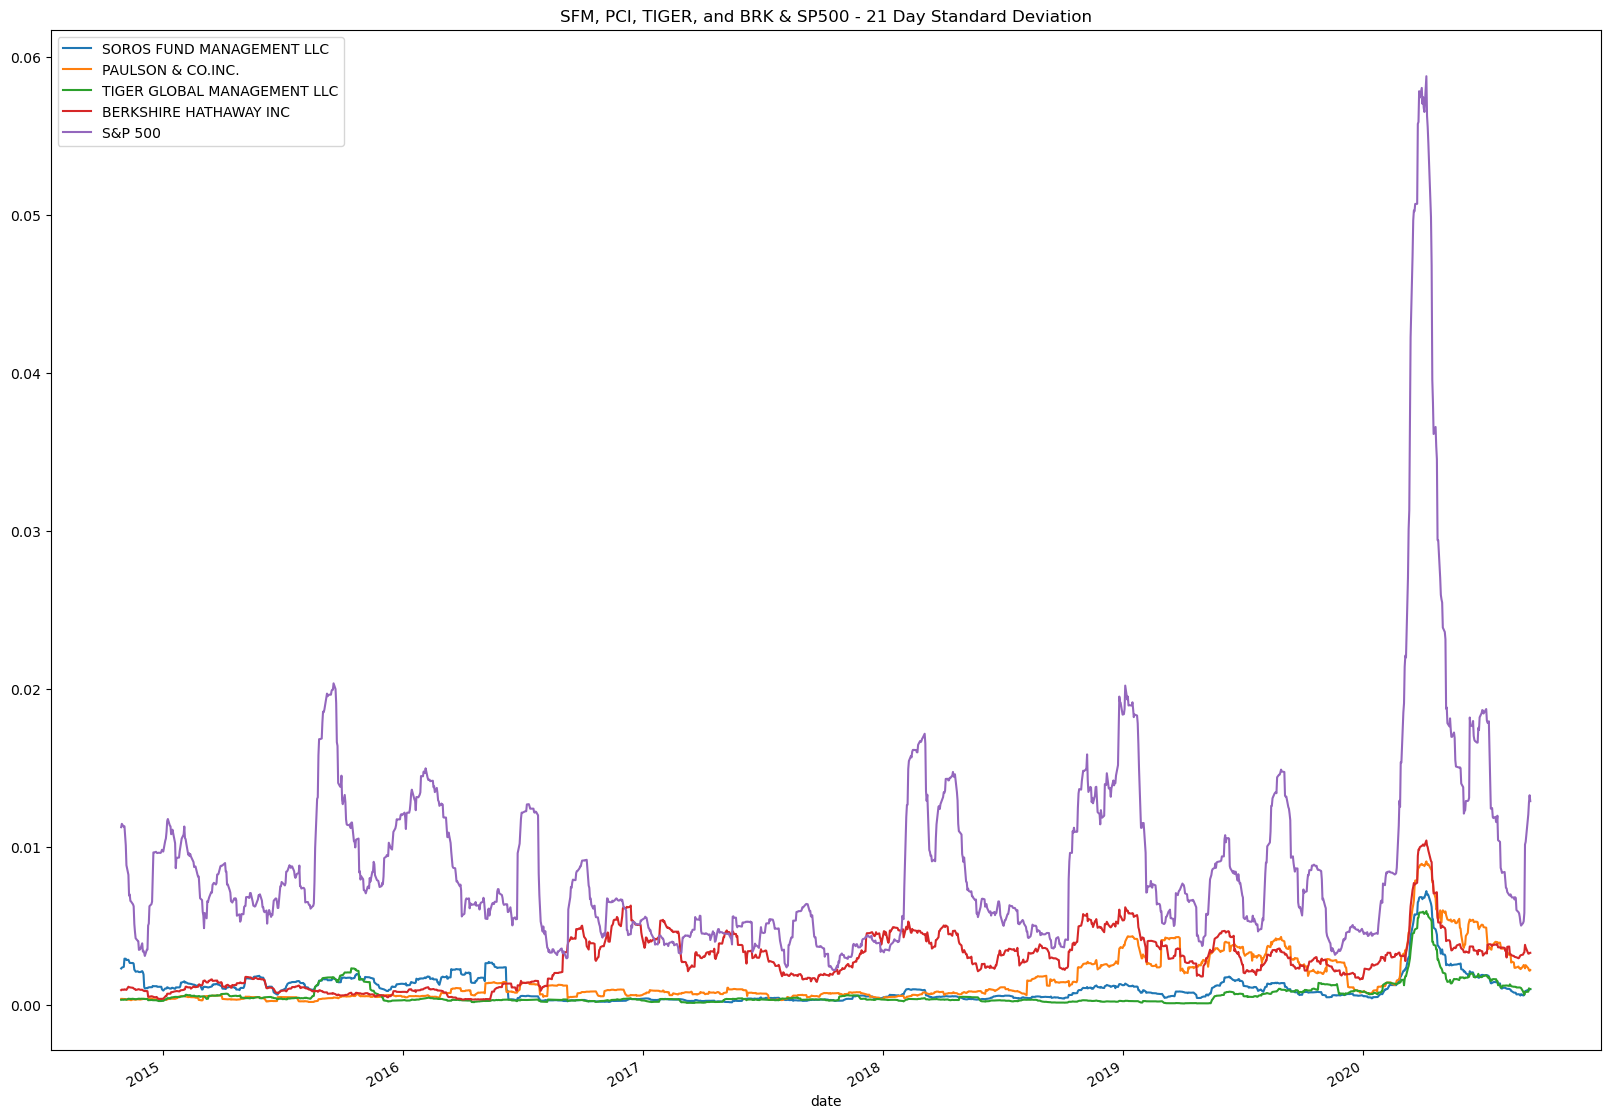

In [59]:
# Using the daily returns DataFrame and a 21-day rolling window, 
daily_returns_std_21 = daily_returns.rolling(window=21).std()

# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
daily_returns_std_21.plot(figsize=(20,15),title='SFM, PCI, TIGER, and BRK & SP500 - 21 Day Standard Deviation')

#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'SFM, PCI, TIGER, and BRK - 21 Day Standard Deviation'}, xlabel='date'>

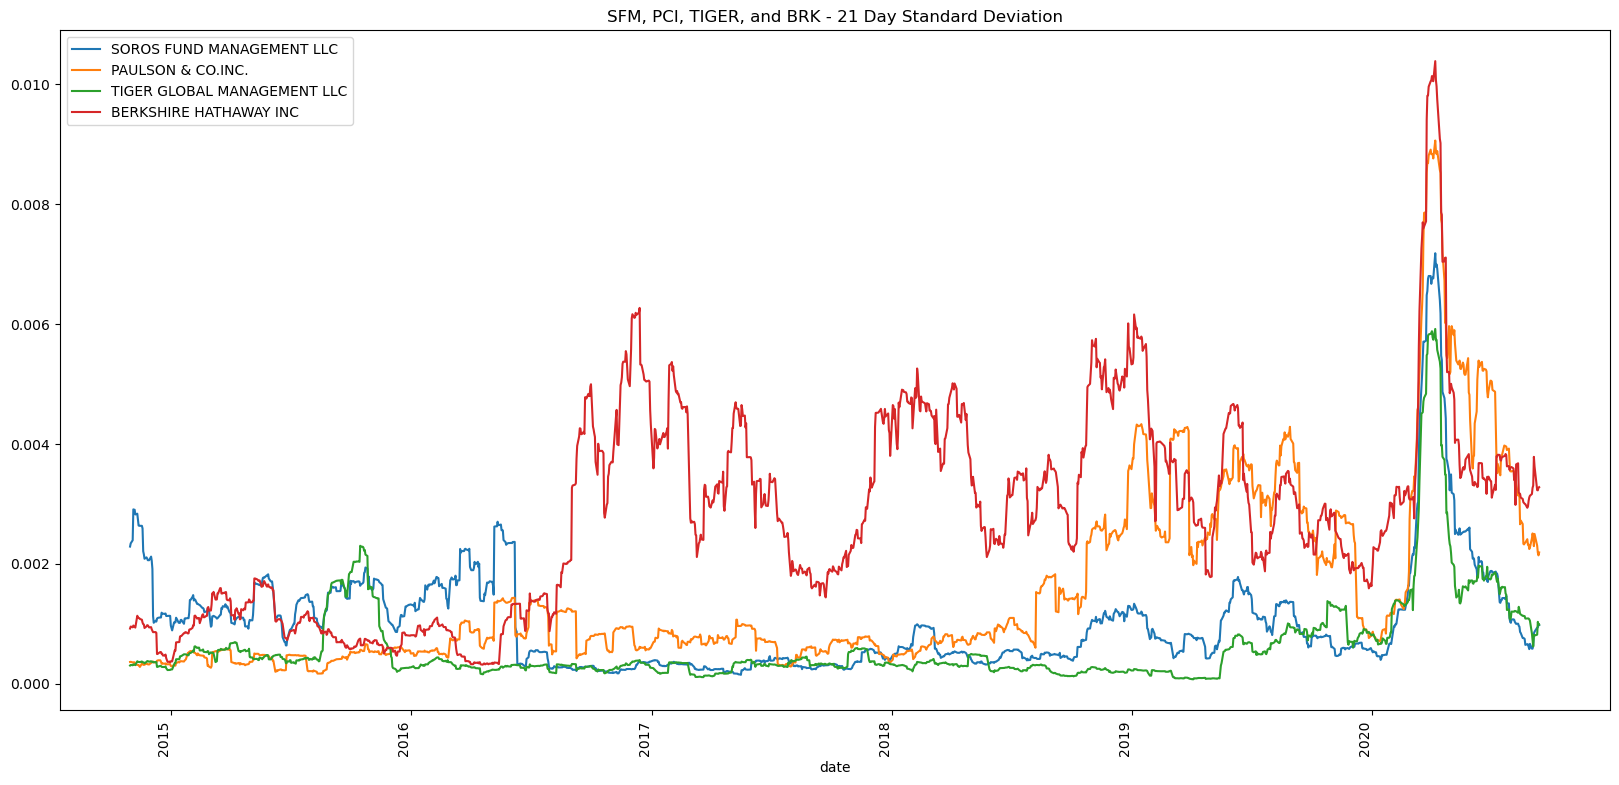

In [60]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
daily_returns_funds_std_21 = daily_returns_funds.rolling(window=21).std()

# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
daily_returns_funds_std_21.plot(figsize=(20,10),title='SFM, PCI, TIGER, and BRK - 21 Day Standard Deviation', rot=90)

#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** Based on the annualized standard deviation metric, **NONE** of the funds pose more risk than the S&P 500. The S&P 500 has by far the largest annualized standard deviation at **0.183345**, where the funds have a much lower annualized standard deviations; 
* TIGER GLOBAL MANAGEMENT LLC   
**0.015804**
* SOROS FUND MANAGEMENT LLC   
**0.022297**
* PAULSON & CO.INC.   
**0.034912** 
* BERKSHIRE HATHAWAY INC   
**0.051692.**
  
Based on above we can conclude that the S&P 500 index compared to the funds poses the largest risk in the measured period. 

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** Based on the rolling 21 day standard deviation metric, my conclusion is that;
* Since mid 2016 Berhshire Hathaway's risk seems to increase with increases in risk of the S&P500. Before mid 2016 Berkshire Hathaway displays limited risk increase while risk of S&P500 increases. 
* The other 3 funds start to show increased risk at the same time that the risk of the S&P500 increases starting Q3 2018. Before Q3 2018 the 3 funds display limited risk increases while risk of S&P500 increases. 


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** 
Based on the 21 day rolling standard deviations we can conclude the following about which portfolio poses the most risk. 
* Until about mid 2016 SOROS poses the largest risk of the 4 funds based on a significantly larger 21 day rolling standard deviation. 
* From mid 2016 Bershire Hathaway's risk increases significantly above the other 3 funds which continues to the beginning of 2019. 
* From the beginning of 2019 till the end of 2020 Berkshire Hathaway and Paulson and Co pose a similar risk that is significantly higher than the other 2 funds Tiger and Soros. 
* At the end of 2020 Paulson and Co's risk decreases and Berkshare Hathaway briefly again has a significantly higher risk than that of the other 3 funds. 
* During March 2020 the risk of all 4 funds increases significantly. Where both Berkshire Hathaway and Paulson & Co Inc remain elevated in the aftermath of COVID19 compare to Tiger and Soros. 

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [61]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
annual_average_return = daily_returns.mean() * trading_days

# Review the annual average returns sorted from lowest to highest
annual_average_return.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [62]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
sharp_ratios = annual_average_return / annualized_standard_deviation

# Review the Sharpe ratios sorted lowest to highest
sharp_ratios.sort_values()

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Sharp Ratios SFM, PCI, TIGER, and BRK & SP500'}>

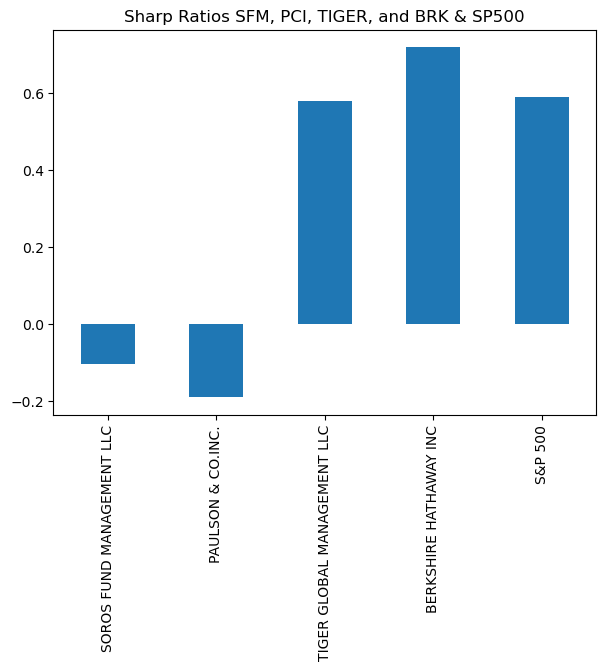

In [66]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
sharp_ratios.plot(kind='bar',figsize=(7,5),rot=90, title='Sharp Ratios SFM, PCI, TIGER, and BRK & SP500')

#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** Based on above sharp ratios, Berkshire Hathaway has the highest risk return profile with a sharp ratio of about 0.71. Paulson & Co Inc has the worst risk return profile with a sharp ratio of about -0.19. 

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [11]:
# create short names for fund_names in csv file for ease of use
SFM = "SOROS FUND MANAGEMENT LLC"
PCI = "PAULSON & CO.INC."
TIGER = "TIGER GLOBAL MANAGEMENT LLC"
BRK = "BERKSHIRE HATHAWAY INC"
SP = "S&P 500"

In [73]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
sp500_var_60 = daily_returns[SP].rolling(window=60).var()

# Review the last 5 rows of the SP500 rolling 60 day variance DataFrame
sp500_var_60.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [77]:
# Calculate the covariance using a 60-day rolling window
brk_cov_60 = daily_returns[BRK].rolling(window=60).cov(daily_returns[SP])
# Review the last five rows of the covariance data
brk_cov_60.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [78]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
brk_beta_60 = brk_cov_60 / sp500_var_60

# Review the last five rows of the beta information
brk_beta_60.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [82]:
# Calculate the average of the 60-day rolling beta
brk_beta_mean_60 = brk_beta_60.mean()

print(f'The average 60 day rolling beta for {BRK} equals {brk_beta_mean_60:.6f}')

The average 60 day rolling beta for BERKSHIRE HATHAWAY INC equals 0.221499


##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'60 Day rolling Beta for BERKSHIRE HATHAWAY INC'}, xlabel='date'>

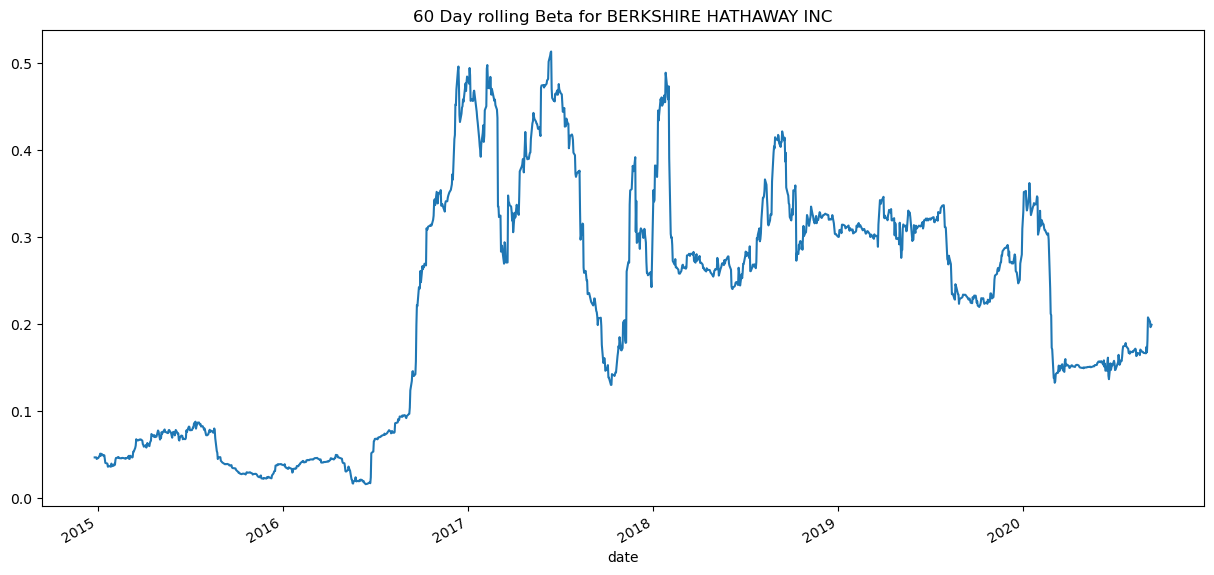

In [86]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
brk_beta_60.plot(figsize=(15,7),title='60 Day rolling Beta for ' + BRK)

##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [87]:
# Calculate the covariance using a 60-day rolling window 
tiger_cov_60 = daily_returns[TIGER].rolling(window=60).cov(daily_returns[SP])
# Review the last five rows of the covariance data
tiger_cov_60.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [88]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
tiger_beta_60 = tiger_cov_60 / sp500_var_60
# Review the last five rows of the beta information
tiger_beta_60.tail()

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [89]:
# Calculate the average of the 60-day rolling beta
tiger_beta_mean_60 = tiger_beta_60.mean()

print(f'The average 60 day rolling beta for {TIGER} equals {tiger_beta_mean_60:.6f}')

The average 60 day rolling beta for TIGER GLOBAL MANAGEMENT LLC equals 0.030930


##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'60 Day rolling Beta for TIGER GLOBAL MANAGEMENT LLC'}, xlabel='date'>

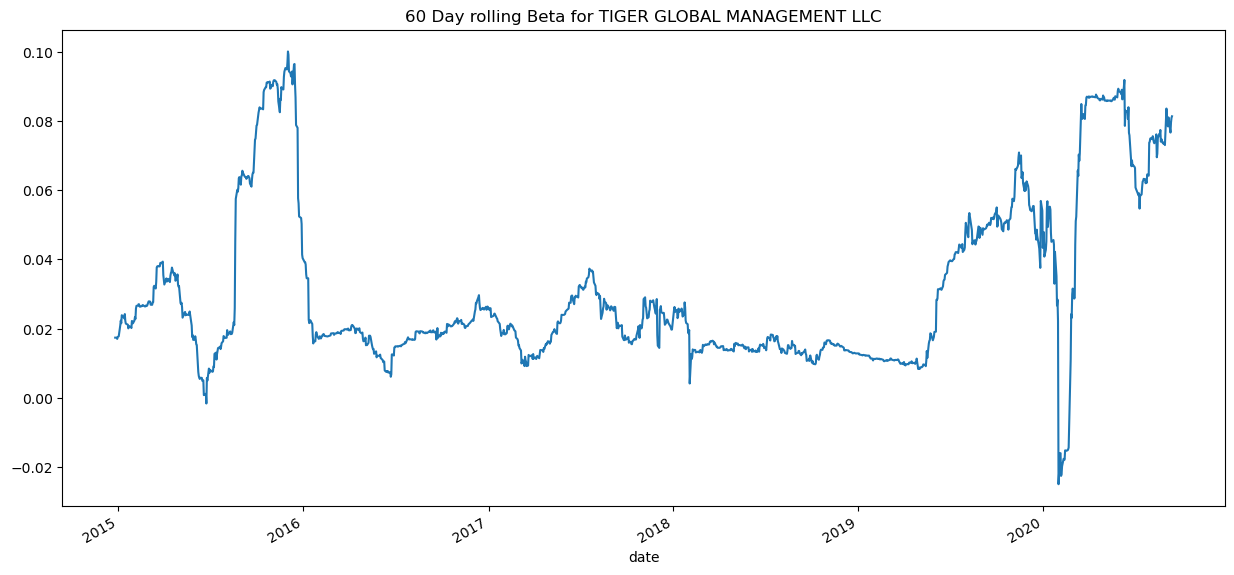

In [90]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
tiger_beta_60.plot(figsize=(15,7),title='60 Day rolling Beta for ' + TIGER)

#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** Based on above data we can conclude that Berkshire Hathaway is more sensitive to movements in the S&P500. Over the given time periode it displays a much higher 60 day rolling beta than Tiger Global Management. Meaning the effect of SP500 movements has a direct effect on the movements of Berkshire Hathaway. 


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** Considering the requirement that we need to find the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas. I recommend to add Berkshire Hathaway to the portfolio. 
Of the 4 funds BRK has the highest annual average return over the period (3.7%), the highest Sharpe ratio (0.71) and it has an average beta of 0.22 (SP500 benchmark). BRK does have the highest annualized standard deviation and compared to the 3 other funds BRK displays a higher 21 rolling day standard deviation, but much lower than that of the S&P500.  


---